In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
from random import randint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [2]:
NUM_SQUARES = 1000
X_train = []
for i in range(NUM_SQUARES):
    exp =np.zeros((28, 28))
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    if randint(0, 1) == 0: # sometie true
        exp = np.fliplr(exp)
    X_train.append(exp)

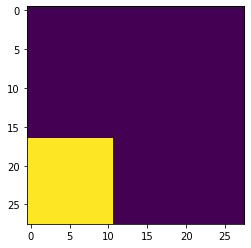

In [3]:
plt.imshow(X_train[100])

In [4]:
blurred_x = []
noisy_x = []
for x in X_train:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

In [5]:
X_train_aug = X_train.copy()
X_train_aug += blurred_x
X_train_aug += noisy_x
print(len(X_train))
print(len(X_train_aug))

1000
3000


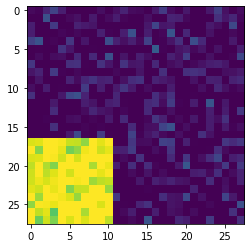

In [6]:
plt.imshow(X_train_aug[2100])

In [7]:
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
print(len(X_train))

2000


In [8]:
blurred_x = []
noisy_x = []
for x in X_train[200:]:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

In [9]:
X_train_aug += X_train[200:].copy()
X_train_aug += blurred_x
X_train_aug += noisy_x
print(len(X_train))
print(len(X_train_aug))

2000
8400


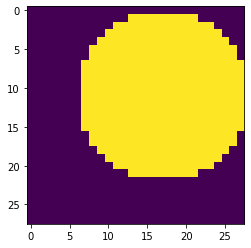

In [10]:
plt.imshow(X_train_aug[4400]) # with blurr

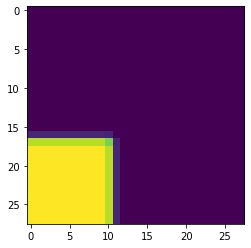

In [11]:
plt.imshow(X_train_aug[1100]) # with noisy

In [12]:
X_train = np.array(X_train)
X_train_aug = np.array(X_train_aug)
X_train_aug.shape

(8400, 28, 28)

In [13]:
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])
Y_train_aug = np.array([1 if i < NUM_SQUARES * 3 else 0 for i in range(NUM_SQUARES * 6)])

In [14]:
# shuffle training data
shuffler = np.random.permutation(NUM_SQUARES*2)
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]

In [15]:
# shuffle augmented data
shuffler = np.random.permutation(NUM_SQUARES*6)
X_train_aug = X_train_aug[shuffler]
Y_train_aug = Y_train_aug[shuffler]

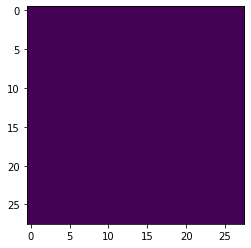

In [16]:
plt.imshow(X_train_aug[100])

In [17]:
# make training and testing data
NUM_TRAIN =int(NUM_SQUARES*2*0.85)
X_test = X_train[NUM_TRAIN:]
Y_test = Y_train[NUM_TRAIN:]
X_train = X_train[:NUM_TRAIN]
Y_train = Y_train[:NUM_TRAIN]

In [18]:
# make training and testing data
NUM_TRAIN =int(NUM_SQUARES*6*0.85)
X_test_aug = X_train_aug[NUM_TRAIN:]
Y_test_aug = Y_train_aug[NUM_TRAIN:]
X_train_aug = X_train_aug[:NUM_TRAIN]
Y_train_aug = Y_train_aug[:NUM_TRAIN]

In [19]:
# flatten 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_aug_flattened = X_train_aug.reshape(len(X_train_aug), 28*28)
X_test_aug_flattened = X_test_aug.reshape(len(X_test_aug), 28*28)

In [20]:
# addign a hidden layer
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7100
Epoch 2/10
54/54 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8259
Epoch 3/10
54/54 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8647
Epoch 4/10
54/54 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8876
Epoch 5/10
54/54 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.9000
Epoch 6/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9141
Epoch 7/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9118
Epoch 8/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9306
Epoch 9/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.9335
Epoch 10/10
54/54 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9247


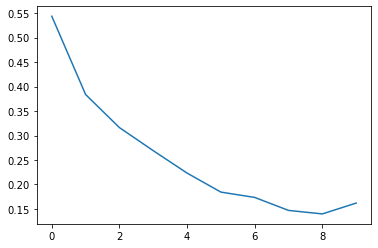

In [21]:
losses = history.history['loss']
timeline = np.arange(len(losses))
pp.plot(timeline, losses)
pp.show()

In [22]:
model.evaluate(X_test_flattened, Y_test)

10/10 [==============================] - 0s 880us/step - loss: 0.2649 - accuracy: 0.8867


[0.26492419838905334, 0.8866666555404663]

In [23]:
# addign a hidden layer
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_aug_flattened, Y_train_aug, epochs=20, callbacks=[history])

Epoch 1/20
160/160 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.6194
Epoch 2/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.6692
Epoch 3/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.6906
Epoch 4/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7008
Epoch 5/20
160/160 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.6969
Epoch 6/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.6990
Epoch 7/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7051
Epoch 8/20
160/160 [==============================] - 0s 991us/step - loss: 0.4812 - accuracy: 0.7049
Epoch 9/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7049
Epoch 10/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.71

In [24]:
losses = history.history['loss']
timeline = np.arange(len(losses))

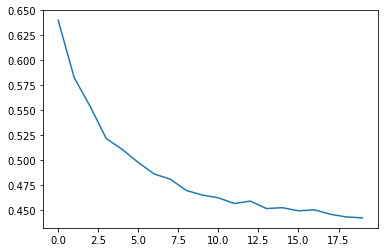

In [25]:
pp.plot(timeline, losses)
pp.show()

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
n_images = len(X_train)
x_wanted = X_train.reshape(n_images, 28, 28, 1)
x_wanted.shape

(1700, 28, 28, 1)

In [30]:
cnn.fit(x_wanted, Y_train, epochs=10)

Epoch 1/10
54/54 [==============================] - 1s 9ms/step - loss: 0.5967 - accuracy: 0.6724
Epoch 2/10
54/54 [==============================] - 0s 9ms/step - loss: 0.3619 - accuracy: 0.8500
Epoch 3/10
54/54 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.9059
Epoch 4/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1855 - accuracy: 0.9176
Epoch 5/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1566 - accuracy: 0.9282
Epoch 6/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1464 - accuracy: 0.9306
Epoch 7/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1388 - accuracy: 0.9294
Epoch 8/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1230 - accuracy: 0.9376
Epoch 9/10
54/54 [==============================] - 0s 8ms/step - loss: 0.1203 - accuracy: 0.9371
Epoch 10/10
54/54 [==============================] - 0s 9ms/step - loss: 0.1210 - accuracy: 0.9371
